# Active Learning appliqué à la classification : Exemple du jeu de données Iris 

On importe les bibliothèques nécessaires.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib as mpl
import seaborn as sns

from modAL.models import ActiveLearner

### 1- Le jeu de données :

In [24]:
# On télécharge le jeu de données Iris :
iris = load_iris()

In [25]:
#On sépare les caractéristiques et la varible cible  
df_iris = pd.DataFrame(iris.data,columns=iris.feature_names)
df_iris['target'] = pd.Series(iris.target)
df_iris['target'] = df_iris.target.replace(dict(enumerate(iris.target_names)))
df_iris.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [26]:
# On affiche la taille du jeu de données 
df_iris.shape

(150, 5)

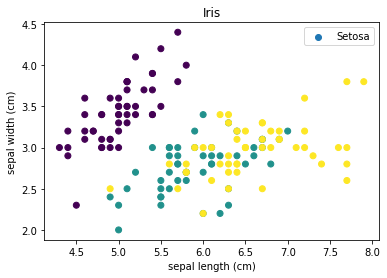

In [27]:
#%matplotlib inline     # Commande uniquement Notebook : permet l'affichage des courbes
import matplotlib.pyplot as plt        
X = df_iris[['sepal length (cm)','sepal width (cm)','petal length (cm)', 'petal width (cm)']]
y = df_iris['target']
Color = iris.target
abscisse = 0
ordonnee = 1

plt.scatter(X.iloc[:, abscisse], X.iloc[:, ordonnee], c=Color)   # Définition des abscisses et des ordonnées, ainsi que de la couleur
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris')
plt.legend(['Setosa', 'virsicolor','Virginica'])
plt.show()    # Affichage de la courbe

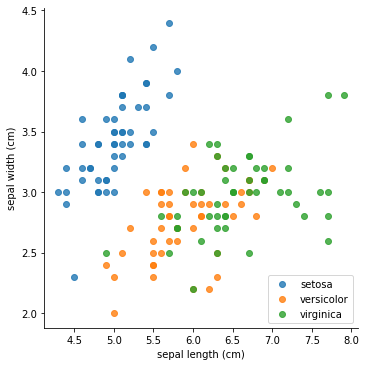

In [28]:
sns.lmplot( x="sepal length (cm)", y="sepal width (cm)", data=df_iris, fit_reg=False, hue='target', legend=False)
plt.legend(loc='lower right')
plt.show()

In [29]:
# On convertit le jeu de données en une matrice (array) 
X_raw=X.to_numpy()
y_raw=y.to_numpy()

### 2- On divise le jeu de données en un ensemble d'apprentissage U et L  : 

In [30]:
# Ensemble d'entraînement L composé de 3 exemples
train_idx = [0, 50, 100]
X_label = X_raw[train_idx]
y_label = y_raw[train_idx]

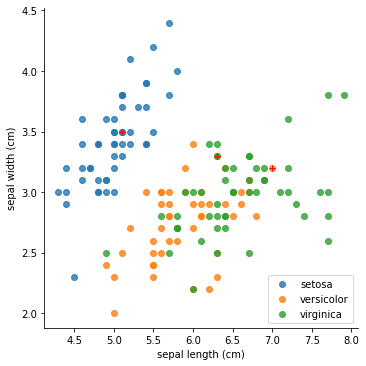

In [31]:
sns.lmplot( x="sepal length (cm)", y="sepal width (cm)", data=df_iris, fit_reg=False, hue='target', legend=False)
plt.plot(X_label[:,0],X_label[:,1],'r+')
plt.legend(loc='lower right')
plt.show()

In [32]:
X_unlabel = np.delete(X_raw, train_idx, axis=0) 
y_unlabel = np.delete(y_raw, train_idx, axis=0)

### 3- On entraîne notre modèle qu'on appelle learner (apprenant) 

In [11]:
from sklearn.tree import DecisionTreeClassifier
from modAL.uncertainty import uncertainty_sampling

learner = ActiveLearner(
    estimator=DecisionTreeClassifier(),
    X_training=X_label, y_training=y_label,
    query_strategy=uncertainty_sampling
)

Voyons comment notre classificateur fonctionne sur l'ensemble d'entraînement initial!

In [12]:
# Isolez les données dont nous avons besoin pour le traçage.
predictions = learner.predict(X_raw)
is_correct = (predictions == y_raw)
predictions

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [13]:
is_correct

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True, False,  True,  True, False, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True, False,
       False, False,

In [14]:
# Enregistrez le score de notre apprenant sur les données brutes.
unqueried_score = learner.score(X_raw, y_raw)
print(unqueried_score)

0.8533333333333334


Ensuite, nous ajustons notre classificateur en lui permettant d'interroger 20 instances qu'il n'a jamais vues auparavant. En utilisant un échantillonnage d'incertitude, notre classificateur vise à réduire le degré d'incertitude dans ses prédictions en utilisant une variété de mesures.

### 3- On rajoute des instances choisies du pool 

In [15]:
N_QUERIES = 20
performance_history = [unqueried_score]
# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_unlabel)
# Teach our ActiveLearner model the record it has requested.
    X, y = X_unlabel[query_index].reshape(1, -1), y_unlabel[query_index].reshape(1, )
    learner.teach(X=X, y=y)
    # Remove the queried instance from the unlabeled pool.
    X_unlabel, y_unlabel = np.delete(X_unlabel, query_index, axis=0), np.delete(y_unlabel, query_index)
    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X_raw, y_raw)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))
    # Save our model's performance for plotting.
    performance_history.append(model_accuracy)

Accuracy after query 1: 0.7000
Accuracy after query 2: 0.7200
Accuracy after query 3: 0.5333
Accuracy after query 4: 0.5600
Accuracy after query 5: 0.5600
Accuracy after query 6: 0.8533
Accuracy after query 7: 0.6800
Accuracy after query 8: 0.8667
Accuracy after query 9: 0.7067
Accuracy after query 10: 0.7000
Accuracy after query 11: 0.8533
Accuracy after query 12: 0.7000
Accuracy after query 13: 0.5200
Accuracy after query 14: 0.8533
Accuracy after query 15: 0.8600
Accuracy after query 16: 0.6400
Accuracy after query 17: 0.5000
Accuracy after query 18: 0.8600
Accuracy after query 19: 0.8600
Accuracy after query 20: 0.8533


In [16]:
print(performance_history)

[0.8533333333333334, 0.7, 0.72, 0.5333333333333333, 0.56, 0.56, 0.8533333333333334, 0.68, 0.8666666666666667, 0.7066666666666667, 0.7, 0.8533333333333334, 0.7, 0.52, 0.8533333333333334, 0.86, 0.64, 0.5, 0.86, 0.86, 0.8533333333333334]


q [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


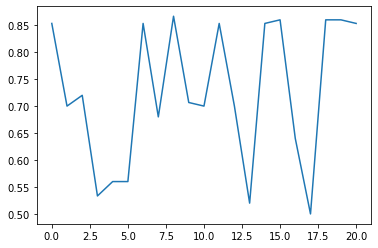

In [17]:
queries = np.arange(21)
print('q',queries)
len(performance_history)
plt.plot(queries, performance_history)

# K plus proches voisins :

In [33]:
# Choix du modèle (L'apprenant)
from sklearn.neighbors import KNeighborsClassifier
learner2 = ActiveLearner(
    estimator=KNeighborsClassifier(n_neighbors=2),
    X_training=X_label, y_training=y_label,
    query_strategy=uncertainty_sampling
)

In [34]:
# Isolez les données dont nous avons besoin pour le traçage.
predictions2 = learner2.predict(X_raw)
is_correct2 = (predictions2 == y_raw)
is_correct2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [35]:
# Enregistrez le score de notre apprenant sur les données brutes.
unqueried_score2 = learner2.score(X_raw, y_raw)
print(unqueried_score2)

0.6133333333333333


In [36]:
N_QUERIES = 20
performance_history2 = [unqueried_score2]
# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
    query_index, query_instance = learner2.query(X_unlabel)
# Teach our ActiveLearner model the record it has requested.
    X, y = X_unlabel[query_index].reshape(1, -1), y_unlabel[query_index].reshape(1, )
    learner2.teach(X=X, y=y)
    # Remove the queried instance from the unlabeled pool.
    X_unlabel, y_unlabel = np.delete(X_unlabel, query_index, axis=0), np.delete(y_unlabel, query_index)
    # Calculate and report our model's accuracy.
    model_accuracy = learner2.score(X_raw, y_raw)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))
    # Save our model's performance for plotting.
    performance_history2.append(model_accuracy)

Accuracy after query 1: 0.6133
Accuracy after query 2: 0.6400
Accuracy after query 3: 0.6600
Accuracy after query 4: 0.6667
Accuracy after query 5: 0.7800
Accuracy after query 6: 0.7800
Accuracy after query 7: 0.7733
Accuracy after query 8: 0.7733
Accuracy after query 9: 0.7400
Accuracy after query 10: 0.7200
Accuracy after query 11: 0.7133
Accuracy after query 12: 0.8267
Accuracy after query 13: 0.8600
Accuracy after query 14: 0.8867
Accuracy after query 15: 0.8533
Accuracy after query 16: 0.8800
Accuracy after query 17: 0.9133
Accuracy after query 18: 0.9200
Accuracy after query 19: 0.9267
Accuracy after query 20: 0.9333


Text(0, 0.5, 'Performance du modèle')

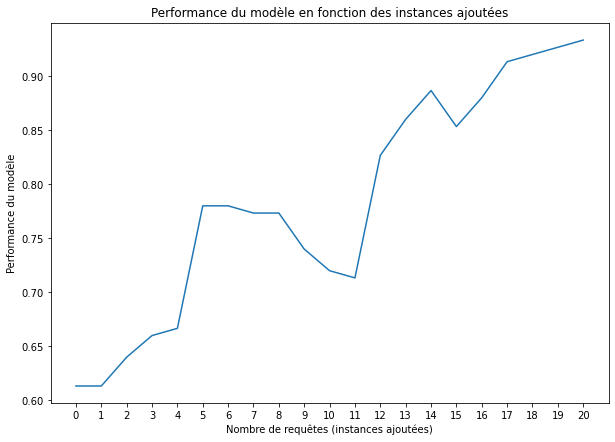

In [37]:
plt.figure(figsize=(10, 7))
plt.plot(queries, performance_history2)
plt.xticks(np.linspace(0,20,21,endpoint=True))
plt.title('Performance du modèle en fonction des instances ajoutées')
plt.xlabel('Nombre de requêtes (instances ajoutées)')
plt.ylabel('Performance du modèle')